Задание №2
--
Выполнила: Соболева Дарья 
--
Студентка 317 группы ВМК МГУ
--
Версия Python: 2.7
--

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from IPython.display import display

from nearest_neighbors import KNN_classifier
from cross_validation import kfold, knn_cross_val_score, accuracy_score
from plt_confusion_matrix import plot_confusion_matrix

%pylab inline

Первым делом, загрузим детасет MNIST

In [2]:
mnist = fetch_mldata('MNIST original')
data = np.float64(mnist.data)
target = np.int64(mnist.target)

Разобьем детасет на обучающую и тестовую выборки

In [3]:
train_size = 60000
test_size = 10000
X_train, y_train = data[:train_size], target[:train_size]
X_test, y_test = data[-test_size:], target[-test_size:]

Визулизируем по 5 случайных обьектов для каждого из 10 классов

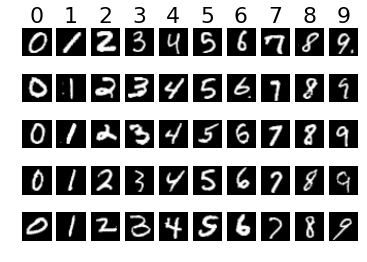

In [11]:
n_cls = 10
n_samples = 5

for cls in range(n_cls):
    train = X_train[y_train==cls]
    idxs = np.random.choice(train.shape[0], n_samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * n_cls + cls + 1
        subplot(n_samples, n_cls, plt_idx)
        imshow(train[idx].reshape((28, 28)), cmap='gray')
        axis("off")
        if i == 0:
            title(cls, fontsize = 22)
        
show()

Оценим время выполнения всех алгоритмов, указанных в спецификации к заданию.

Проведем исследование, какой алгоритм поиска ближайших соседей будет работать быстрее в различных ситуациях.

Замечание: для каждой модели зафиксируем число ближайших соседей (k=5), а также рассмотрим подмножество признаков
    (выбирается один раз для всех обьектов случайным образом), размера: {10, 20, 100},
    на которых будет считаться расстояние.
    
В конкурсе участвуют:
    
* nearest_neighbors.KNN_classifier(algorithm='brute')
* nearest_neighbors.KNN_classifier(algorithm='kd_tree')
* nearest_neighbors.KNN_classifier(algorithm='ball_tree')
* my_own.MyOwnKNN_classifier()

А также, сравним наши модели с библиотечной реализацией:
* sklearn.neighbors.KNeighborsClassifier(algorithm='brute')
* sklearn.neighbors.KNeighborsClassifier(algorithm='kd_tree')
* sklearn.neighbors.KNeighborsClassifier(algorithm='ball_tree')


In [4]:
for n_features in [10, 20, 100]:
    scores = {}
    features = np.random.choice(X_train.shape[1], n_features, replace=False)
    
    X_train_ = X_train[:, features]
    X_test_ = X_test[:, features]
    
    strategy = 'brute'
    
    knn = KNN_classifier(
                  strategy=strategy,
          ).fit(X_train_, y_train)
    
    start = time.clock()
    scores['KNN_classifier:{}'.format(strategy)] = {
          'Accuracy': accuracy_score(knn.predict(X_test_), y_test),
          'Prediction time': time.clock() - start 
        }
    
    knn = KNeighborsClassifier(
                  n_neighbors=5,
                  algorithm=strategy,
                  metric='euclidean'
          ).fit(X_train_, y_train)
    
    start = time.clock()
    scores['KNeighborsClassifier:{}'.format(strategy)] = {
          'Accuracy': accuracy_score(knn.predict(X_test_), y_test),
          'Prediction time': time.clock() - start 
        }
     
    strategy = 'kd_tree'    
    
    knn = KNN_classifier(
                  strategy=strategy,
          ).fit(X_train_, y_train)
    
    start = time.clock()
    scores['KNN_classifier:{}'.format(strategy)] = {
          'Accuracy': accuracy_score(knn.predict(X_test_), y_test),
          'Prediction time': time.clock() - start 
        }
    
    knn = KNeighborsClassifier(
                  n_neighbors=5,
                  algorithm=strategy,
                  metric='euclidean'
          ).fit(X_train_, y_train)
    
    start = time.clock()
    scores['KNeighborsClassifier:{}'.format(strategy)] = {
          'Accuracy': accuracy_score(knn.predict(X_test_), y_test),
          'Prediction time': time.clock() - start 
        }

    strategy = 'ball_tree'
            
    knn = KNN_classifier(
                  strategy=strategy,
          ).fit(X_train_, y_train)
    
    start = time.clock()
    scores['KNN_classifier:{}'.format(strategy)] = {
          'Accuracy': accuracy_score(knn.predict(X_test_), y_test),
          'Prediction time': time.clock() - start 
        }
    
                
    knn = KNeighborsClassifier(
                  n_neighbors=5,
                  algorithm=strategy,
                  metric='euclidean'
          ).fit(X_train_, y_train)
    
    start = time.clock()
    scores['KNeighborsClassifier:{}'.format(strategy)] = {
          'Accuracy': accuracy_score(knn.predict(X_test_), y_test),
          'Prediction time': time.clock() - start 
        }
  
    strategy = 'my_own'    
    
    knn = KNN_classifier(
                  strategy=strategy,
          ).fit(X_train_, y_train)
    
    start = time.clock()
    scores['KNN_classifier:{}'.format(strategy)] = {
          'Accuracy': accuracy_score(knn.predict(X_test_), y_test),
          'Prediction time': time.clock() - start 
        }
    print "N_features:", n_features
    display(pd.DataFrame(scores).T)

N_features: 10


,Accuracy,Prediction time
KNN_classifier:ball_tree,0.3248,3.979055
KNN_classifier:brute,0.3371,33.482291
KNN_classifier:kd_tree,0.3246,1.571858
KNN_classifier:my_own,0.3371,34.018032
KNeighborsClassifier:ball_tree,0.3248,4.131902
KNeighborsClassifier:brute,0.3371,19.440691
KNeighborsClassifier:kd_tree,0.3246,1.554383


N_features: 20


,Accuracy,Prediction time
KNN_classifier:ball_tree,0.5141,9.970912
KNN_classifier:brute,0.5049,34.302891
KNN_classifier:kd_tree,0.5146,2.591287
KNN_classifier:my_own,0.5049,35.406106
KNeighborsClassifier:ball_tree,0.5141,10.275651
KNeighborsClassifier:brute,0.5049,18.741249
KNeighborsClassifier:kd_tree,0.5146,2.599648


N_features: 100


,Accuracy,Prediction time
KNN_classifier:ball_tree,0.9131,170.625129
KNN_classifier:brute,0.9131,47.665274
KNN_classifier:kd_tree,0.9131,152.158464
KNN_classifier:my_own,0.9131,50.193393
KNeighborsClassifier:ball_tree,0.9131,164.687452
KNeighborsClassifier:brute,0.9131,27.811727
KNeighborsClassifier:kd_tree,0.9131,135.873154


Естественно полагать, что с увеличением размера признакового пространства модель будет иметь больше информации об объектах.
В нашем примере переобучения выявлено не было, потому как доля правильных ответов модели (accuracy) на тестовой выборке увеличивалась с ростом числа признаков.
Однако, для того, чтобы быть полностью уверенным, необходимо оценить качество на обучении.

Оценка скорости работы моделей совпадает с ожидаемой. Учитывая небольшое число признаков, модель быстрее осуществляет свою работу.
Особенно чувствительны к этому модели, строящие структуры, обеспечивающие эффективный поиск ближайших соседей для заданного тестового объекта.
('kd_tree', 'ball_tree'). Скорость поиска ближайшего соседа: O(log(l)), где l - размер выборки.
    
Поэтому для большого числа признаков, эффективнее использовать метод, основанный на построении матрицы попарных расстояний
между тестовым объектом и объектами из обучающей выборки.('brute', 'my_own'). Скорость поиска ближайшего соседа: O(l), где l - размер выборки.
     

Чему есть теоритическое обоснование, рассказанное нам на семинарах по ММРО:
    
[Sem03_knn.pdf](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem03_knn.pdf)
        
А также подробно описанное в статье:
    
[1210.6122.pdf](https://arxiv.org/pdf/1210.6122.pdf)

Скорость работы библиотечных функций сильно отличается от моих реализацией, возможно, из-за наличие в их коде распараллеливания процессов.
Заметно, что для моделей 'kd_tree' и 'ball_tree' разница совсем не существенная.


------------

Оценим по кросс-валидации с 3 фолдами долю правильных ответов и скорость метода k ближайших соседей в зависимости от:
* параметра k (число ближайших соседей). Диапазон изменения: [1, 10]
* используемой метрики, по которой считается расстояние между объектами.
Рассматриваемые метрики: {'euclidean', 'cosine'}.
    
Подробнее об этих параметрах можно прочитать в документации, представленной в модуле nearest_neighbors.

Покажем на графиках зависимость точности предсказаний (среднее по фолдам) от параметра k, для каждой рассматриваемой метрики.

Сравнительный анализ моделей с разными метриками представлен в виде таблицы (оцениваем время работы и долю правильных ответов).

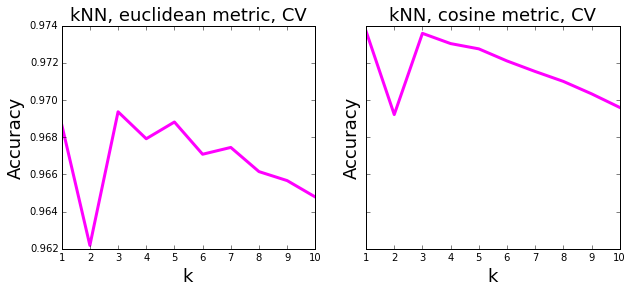

In [4]:
# Проведем оценку параметров на модели 'brute' (анализ построенных таблиц оправдывает использование именно этой модели)
scores = {}
metrics = {"euclidean", "cosine"}
k_list = list(range(1,11))

time_list = []
best_res = []
f, (ax1, ax2) = subplots(1, 2, sharey=True, figsize = (10,4))

for metric, ax in zip (metrics, [ax1, ax2]):
    ax.set_title('kNN, {} metric, CV'.format(metric), fontsize=18)
    ax.set_xlim([1, len(k_list)])
    ax.set_xlabel("k", fontsize = 18)
    ax.set_ylabel('Accuracy', fontsize = 18)
    #ax.text(1, 2, '{} metric'.format(metric), fontsize=18, color = 'magenta')
    
    res = knn_cross_val_score(X_train, y_train, k_list=k_list, metric=metric)
    
    ax.plot(k_list, [np.mean(value) for key, value in res.items()], color='magenta', lw=3)

В данном эксперименте оцениваемым параметром выступало число ближайших соседей (k).

Заметно, что как для модели с евклидовой метрикой, так и для модели с косинусной метрикой k=3 и k=1 являются оптимальными значениями.
Поэтому в следующем эксперименте сравним качество на обучающей и тестовой выборках, чтобы выявить масштабы переобучения.

Необходимо отметить, что на обоих графиках отмечается тенденция уменьшения качества с ростом значения параметра k.

На обоих графиках также наблюдается интересное поведение модели для четных k. 

На лекции по методам машинного обучения Константин Вячеславович Воронцов предостерег нас о возможно странном поведении модели, когда параметр k имеет ту же четность, что и число классов в задаче классификации.
Что и наблюдается на обоих графиках.

In [5]:
scores = {}
knn = KNN_classifier(
        k=1,
        metric='euclidean',
    ).fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
scores['brute_euclidean_1'] = {"Accuracy_Test:": accuracy_score(y_test, y_pred_test),
                               "Accuracy_Train:": accuracy_score(y_train, y_pred_train)}

knn = KNN_classifier(
        k=3,
        metric='euclidean',
    ).fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
scores['brute_euclidean_3'] = {"Accuracy_Test:": accuracy_score(y_test, y_pred_test),
                               "Accuracy_Train:": accuracy_score(y_train, y_pred_train)}
pd.DataFrame(scores).T

,Accuracy_Test:,Accuracy_Train:
brute_euclidean_1,0.9691,1.000000
brute_euclidean_3,0.9705,0.986717


Модель с k=3 имеет более высокую обобщающую способность по сравнению с моделью с k=1.

In [6]:
scores = {}
knn = KNN_classifier(
        k=1,
        metric='cosine',
    ).fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
scores['brute_cosine_1'] = {"Accuracy_Test:": accuracy_score(y_test, y_pred_test),
                            "Accuracy_Train:": accuracy_score(y_train, y_pred_train)}

knn = KNN_classifier(
        k=3,
        metric='cosine',
    ).fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)
scores['brute_cosine_3'] = {"Accuracy_Test:": accuracy_score(y_test, y_pred_test),
                            "Accuracy_Train:": accuracy_score(y_train, y_pred_train)}
pd.DataFrame(scores).T

,Accuracy_Test:,Accuracy_Train:
brute_cosine_1,0.9723,1.000000
brute_cosine_3,0.9733,0.987617


Аналогично модели с евклидовой метрикой, k=3 является оптимальным значением для модели с косинусной метрикой.

In [4]:
k = 3

start = time.clock()
res1 = np.mean(
    knn_cross_val_score(X_train, y_train, metric='euclidean')[k])
time1 = time.clock() - start

start = time.clock()
res2 = np.mean(
    knn_cross_val_score(X_train, y_train, metric='cosine')[k])
time2 = time.clock() - start

scores = {
    'kNN:"brute_euclidean"':{"Accuracy":res1, "Prediction time":time1 },
    'kNN:"brute_cosine"':{"Accuracy": res2, "Prediction time":time2}
}
pd.DataFrame(scores).T

,Accuracy,Prediction time
"kNN:""brute_cosine""",0.973167,178.847545
"kNN:""brute_euclidean""",0.969067,208.406400


Метод, использующий косинусное расстояние оказался лучшим (более высокая accuracy, быстрая скорость работы)

---

Недостаток метода kNN в том, что максимум может достигаться сразу на нескольких классах.
Поэтому часто используют тактику взвешенного голосования: необходимо ввести строго убывающую последовательность
вещественных весов, задающих вклад каждого соседа в классификацию.

Выбор последовательности является эвристикой. В данной работе вес одного соседа будет составлять:
    
    1/(distance+eps), 
    где distance - расстояние до данного соседа, eps=1e-5.
    
Подробнее об использовании весов можно прочитать в  документации, представленной в модуле nearest_neighbors.

Сравнение взвешенного метода с методом без весов будем проводить на кросс-валидации (при тех же фолдах и параметрах).

In [7]:
# Возьмем за основу модель 'brute' с косинусной метрикой. (победитель предыдущих испытаний)

k = 3
scores = {
    'weighted kNN:"brute"':{"Accuracy": np.mean(knn_cross_val_score(X_train, y_train,
                                                                    metric='cosine', weights=True)[k])},
    'kNN:"brute"':{"Accuracy": np.mean(knn_cross_val_score(X_train, y_train, metric='cosine')[k])}
}
pd.DataFrame(scores).T

,Accuracy
"kNN:""brute""",0.974417
"weighted kNN:""brute""",0.974833


Метод, использующий взвешенное голосование оказался лучшим.

----
Итоговый алгоритм

In [8]:
knn = KNN_classifier(
         k=3,
         metric='cosine',
         weights=True,
     ).fit(X_train, y_train)

y_pred_test = knn.predict(X_test)
y_pred_train =  knn.predict(X_train)
scores = {
    'Final_model':{"Accuracy_Test:": accuracy_score(y_test, y_pred_test),
                   "Accuracy_Train:": accuracy_score(y_train, y_pred_train)
    }
}
pd.DataFrame(scores).T

,Accuracy_Test:,Accuracy_Train:
Final_model,0.9742,1.0


Сравнивая качество на тестовой выборке с качеством на обучении приходим к выводу, что наша модель обладает хорошей обобщающей способностью, а также является хорошо обученной.

Качество на тестовой выборке немного хуже (как и во многих случаях), что может объяснятся наличием уникальных объектов в тестовой выборке,
не представленных в обучении.
Кроме того, нельзя отрицать наличия в обучающей выборке плохих объектов, мешающих классификатору. В таком случае необходимо проводить отбор эталонов.

MNIST является детасетом, на котором возможно достичь максимальную accuracy. С этим очень хорошо справляются нейронные сети.
На среднем слое можно поставить knn и получить качество, порядка 99.77%.


Вернемся к нашей модели. Для начала, проанализируем объекты, на которых классифакатор совершил ошибку.

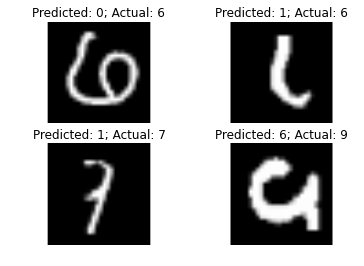

In [54]:
# Выберем 4 случайных обьекта, на которых была допущена ошибка
n_samples = 4
idxs = np.random.choice(np.nonzero(y_test!=y_pred)[0], n_samples, replace=False)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
for idx, ax in zip(idxs, [ax1, ax2, ax3, ax4]):
    ax.imshow(X_test[idx].reshape((28, 28)), cmap='gray')
    ax.axis("off")
    ax.set_title('Predicted: {}; Actual: {}'.format (y_pred[idx],  y_test[idx]))

Рассматривая полученные картинки, понимаешь, что бывают ситуации, когда и человеку сложно определить, что же тут изображено.

Первая картинка похожа и на перевернутую 9, и на 0. Но, все-таки, возможно определить ее как 6.

Вторая картинка является представителем объектов, похожих которым не было в обучающей выборке нужного класса.

На третьей картинке 7 все-таки различима. Чувствуется, что модель нужно совсем немного направить, чтобы получить почти максимальную долю правильных ответов на тестовой выборке.

Четвертая картинка, скорее всего, мною была бы отнесена к 9. Ситуация аналогичная второй картинке. 

Проведу обоснование полученных результатов. Очень важную роль играет косинусная метрика, так как по сути измеряет попиксельные корреляции между картинками.
То есть является не устойчивой (для kNN) к поворотам и сдвигам картинки. Также нельзя не рассматривать проблему "Проклятие размерности", с которой должна помочь справиться метрика Минковского. 

--------------------------

Осталось проанализировать матрицу ошибок

Confusion matrix, without normalization


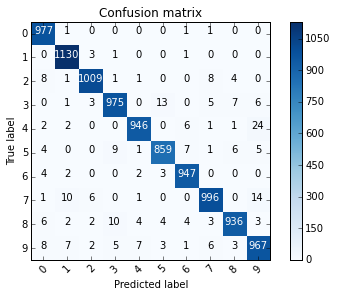

In [6]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.arange(10),
                      title='Confusion matrix')


plt.show()

Так как решалась задача многоклассовой классификации, проанализируем матрицу ошибок на примере какого-нибудь одного класса.

До сих пор для оценки качества работы классификатора использовалась доля правильных ответов
$accuracy = (TP+TN) / (TP+FP+FN+TN)$.

Однако данная метрика имеет свои существенные недостатки.

Более  информативными являются точность и полнота:

* Точность $precision = TP/(TP+FP)$
* Полнота  $recall = TP/(TP+FN)$
* F-мера   $F = 2*precision*recall / (precision+recall)$

Посчитаем точность, полноту и F-меру на примере одного из классов.
Рассмотрим класс с наименьшим значением TP (5 класс)


In [13]:
Presicion_5cls = 0.9739229024943311  #feedback: 859/(859+13+3+4+3)
Recall_5cls = 0.9630044843049327     #feedback: 859/(859+4+9+1+7+1+6+5)
F_5cls = 2*Presicion_5cls*Recall_5cls/(Presicion_5cls+Recall_5cls)
scores = {
    'Final_model':{"Presicion_5cls:": Presicion_5cls,
                   "Recall_5cls:": Recall_5cls,
                   "F_5cls:": F_5cls
    }
}
pd.DataFrame(scores).T

,F_5cls:,Presicion_5cls:,Recall_5cls:
Final_model,0.968433,0.973923,0.963004


По всем рассмотренным метрикам качества модель показала высокие результаты

----